In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

#Kolon isimlendirmelerinde boşluklu isimlendirmeler mevcut
df.columns = [col.strip() for col in df.columns]

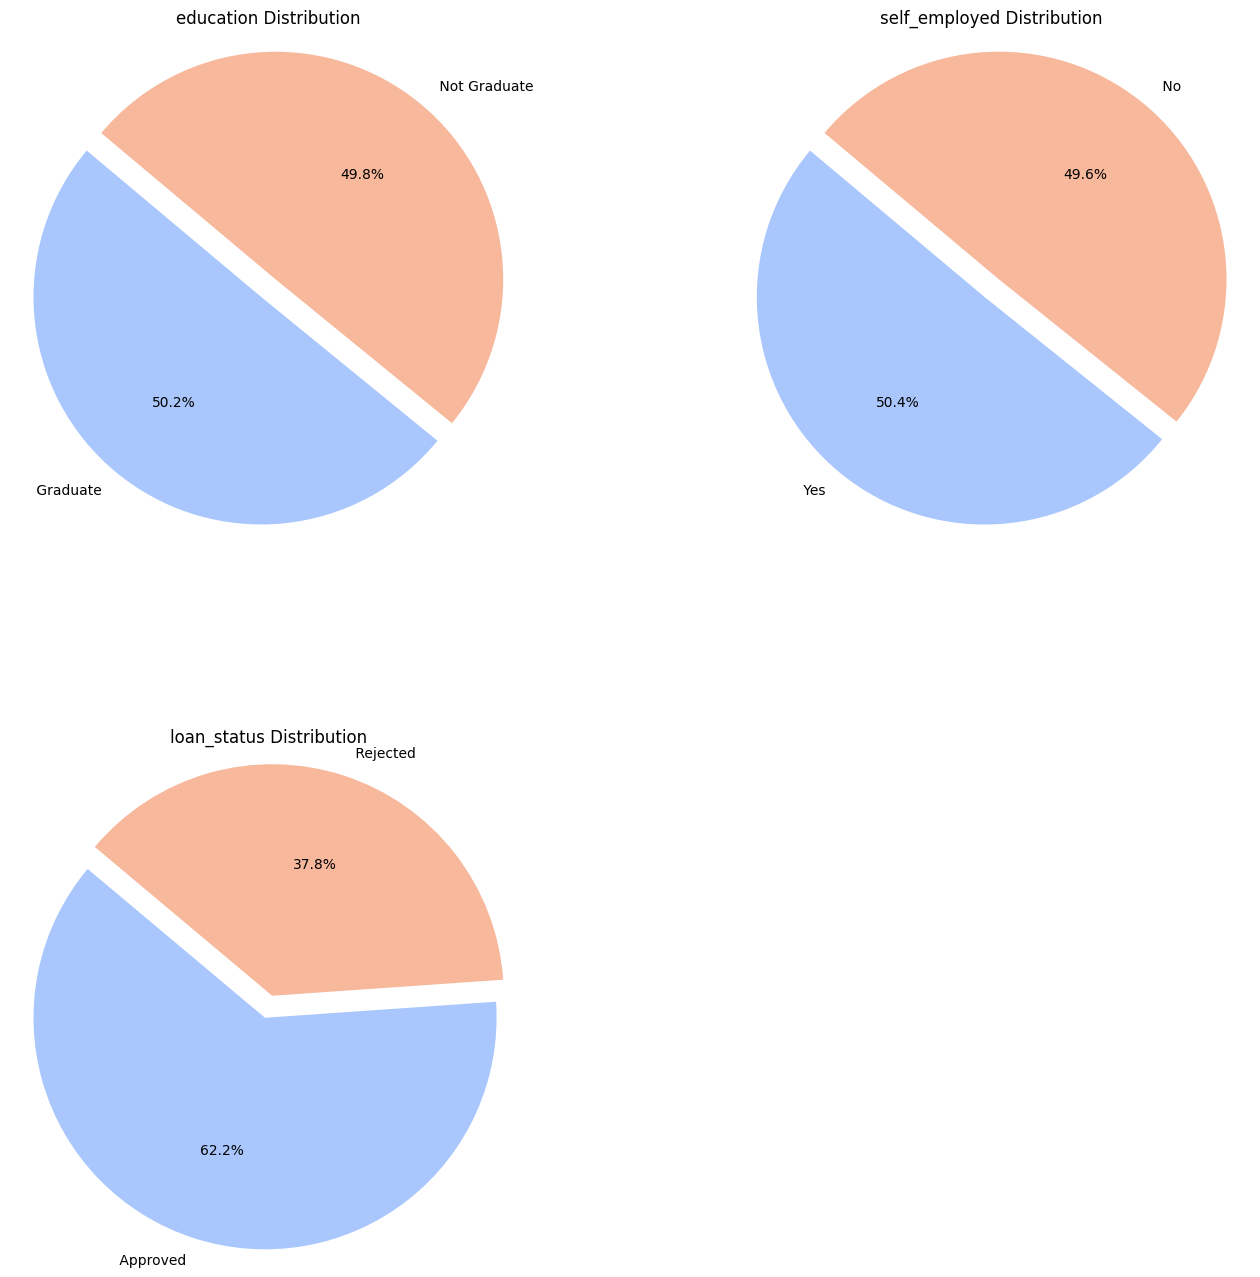

In [3]:
def plot_cat(df, columns):
    num_cols = 2
    num_rows = (len(columns) + 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        colors = sns.color_palette("coolwarm", 2)
        loan_status_counts = df[column].value_counts()
        axes[idx].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
        axes[idx].set_title(f'{column} Distribution')
        axes[idx].axis('equal')

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

plot_cat(df, df.select_dtypes("object").columns.tolist())
